# ResNet50

In [17]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
DS_LABELS = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway","Industrial","Pasture","PermanentCrop",
             "Residential", "River", "SeaLake"]

In [18]:
df_train = pd.read_csv("finished\ResNet50_new\\train_data.csv")
df_train.head()

,train loss,test loss,train accuracy,test accuracy
0,0.621923,0.317729,0.797176,0.905202
1,0.314503,0.523828,0.897222,0.826122
2,0.254335,0.197557,0.915787,0.931398
3,0.195884,0.181987,0.931296,0.938671
4,0.180163,0.174201,0.938009,0.944958


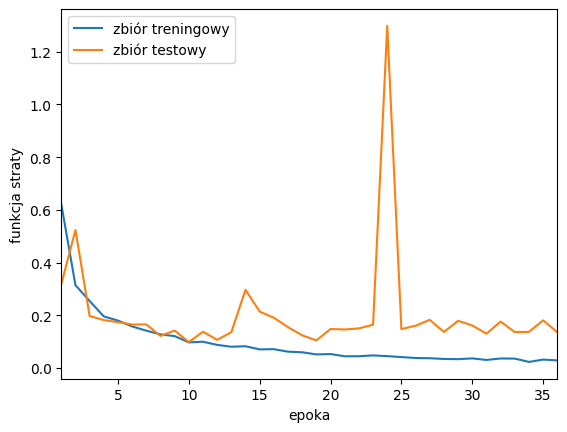

In [19]:
plt.plot(df_train.index+1, df_train["train loss"], label = "zbiór treningowy")
plt.plot(df_train.index+1, df_train["test loss"], label = "zbiór testowy")
plt.xlim([1,36])
plt.legend()
plt.xlabel("epoka")
plt.ylabel("funkcja straty")
plt.show()

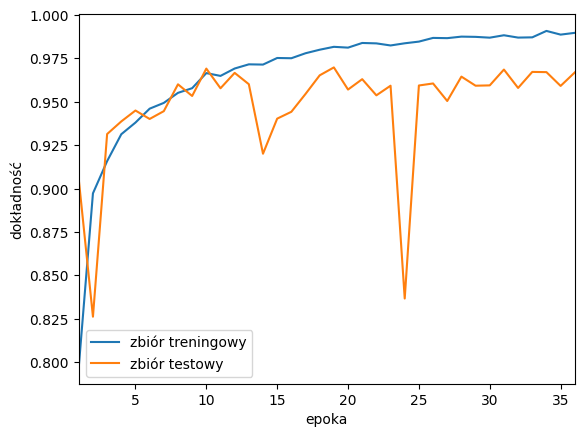

In [20]:
plt.plot(df_train.index+1, df_train["train accuracy"], label = "zbiór treningowy")
plt.plot(df_train.index+1, df_train["test accuracy"], label = "zbiór testowy")
plt.xlim([1,36])
plt.legend()
plt.xlabel("epoka")
plt.ylabel("dokładność")
plt.show()

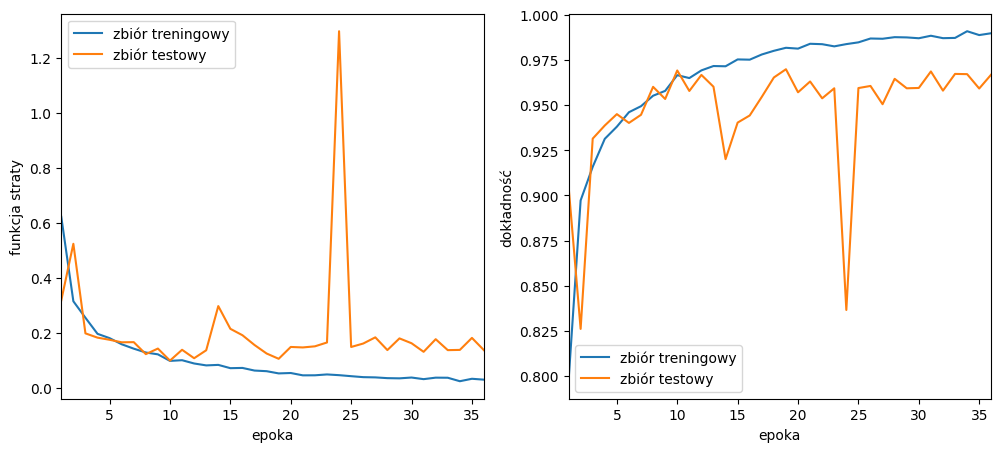

In [21]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax[0].plot(df_train.index+1, df_train["train loss"], label = "zbiór treningowy")
ax[0].plot(df_train.index+1, df_train["test loss"], label = "zbiór testowy")
ax[0].set_xlim([1,36])
ax[0].legend()
ax[0].set_xlabel("epoka")
ax[0].set_ylabel("funkcja straty")
ax[1].plot(df_train.index+1, df_train["train accuracy"], label = "zbiór treningowy")
ax[1].plot(df_train.index+1, df_train["test accuracy"], label = "zbiór testowy")
ax[1].set_xlim([1,36])
ax[1].legend()
ax[1].set_xlabel("epoka")
ax[1].set_ylabel("dokładność")
plt.show()

In [22]:
from torchvision.datasets import EuroSAT
from torchvision.transforms import v2
from src.EuroSat_dataloaders import Train_Dataset_EuroSat,Test_Dataset_EuroSat
import torch
from src.EuroSat_dataloaders import transformation_eurosat

transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


<AxesSubplot: >

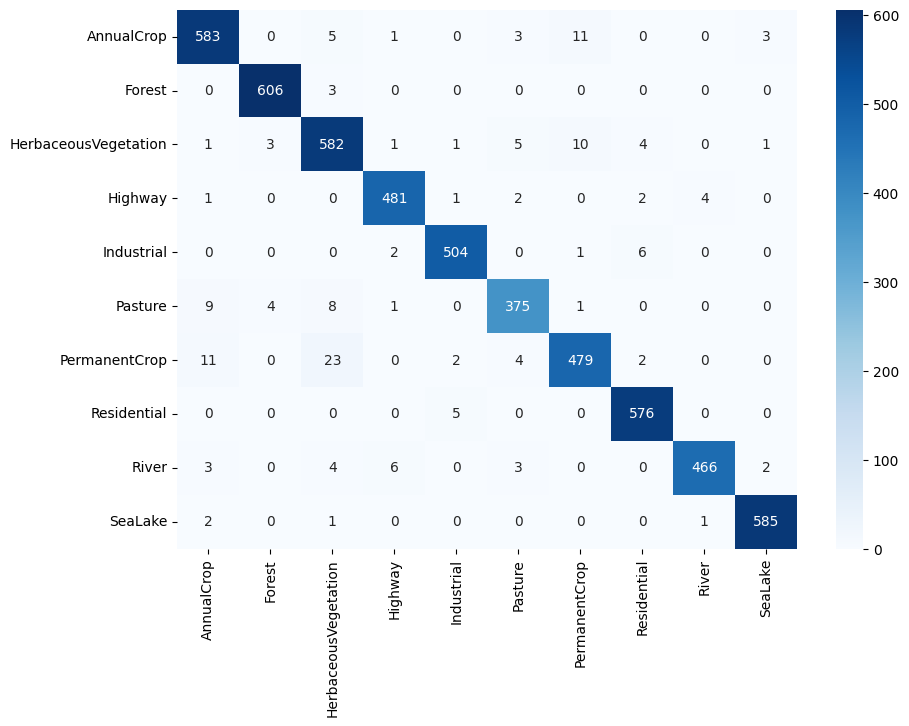

In [23]:
df_pred = pd.read_csv("finished\ResNet50_new\\pred_test.csv")
ds_test = Test_Dataset_EuroSat(ds)
true_val = []
pred_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())
    pred_val.append(df_pred.iloc[i].argmax())
conf = confusion_matrix(true_val,pred_val)
df_cm = pd.DataFrame(conf, index = DS_LABELS,columns = DS_LABELS)
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')


In [24]:
precision_recall_fscore_support(true_val,pred_val, average='macro')

(0.9700448443080962, 0.9685456225644649, 0.969210982772452, None)

In [25]:
accuracy_score(true_val,pred_val)

0.9698148148148148

# VGG-16

In [26]:
df_train = pd.read_csv("finished\\VGG16\\train_data.csv")
df_train.head()

,train loss,test loss,train accuracy,test accuracy
0,0.575937,0.247998,0.834444,0.928624
1,0.352925,0.293155,0.905000,0.919132
2,0.323222,0.347376,0.917269,0.917591
3,0.288401,0.345197,0.931667,0.935404
4,0.322605,0.369134,0.931852,0.930104


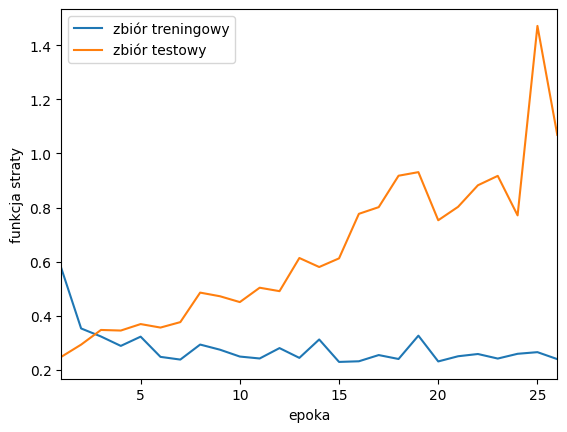

In [27]:
plt.plot(df_train.index+1, df_train["train loss"], label = "zbiór treningowy")
plt.plot(df_train.index+1, df_train["test loss"], label = "zbiór testowy")
plt.xlim([1,26])
plt.legend()
plt.xlabel("epoka")
plt.ylabel("funkcja straty")
plt.show()

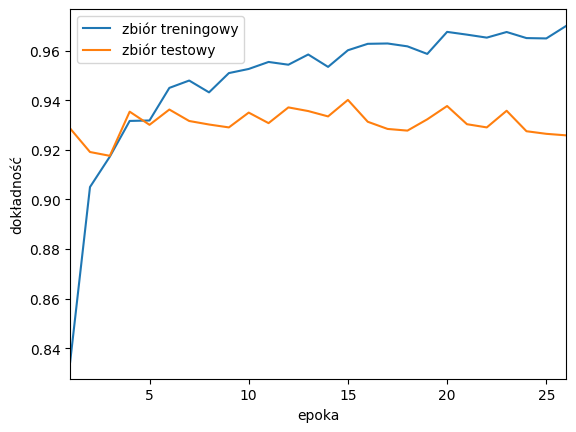

In [28]:
plt.plot(df_train.index+1, df_train["train accuracy"], label = "zbiór treningowy")
plt.plot(df_train.index+1, df_train["test accuracy"], label = "zbiór testowy")
plt.xlim([1,26])
plt.legend()
plt.xlabel("epoka")
plt.ylabel("dokładność")
plt.show()

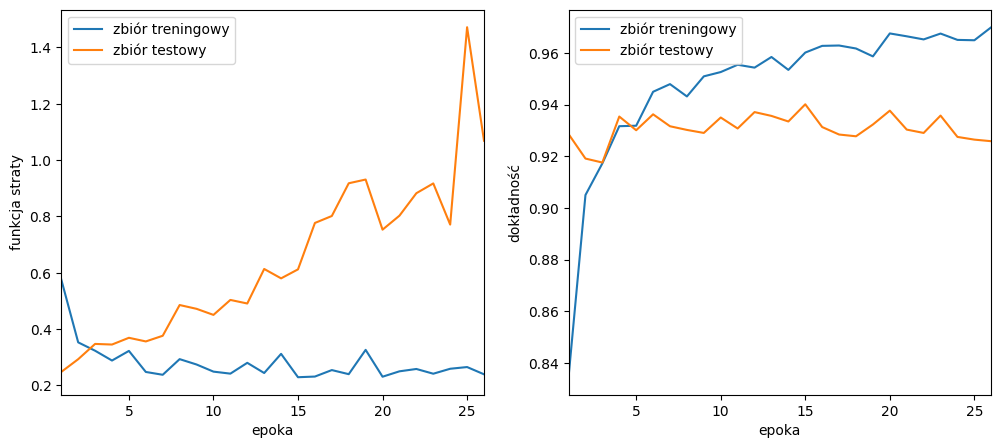

In [34]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax[0].plot(df_train.index+1, df_train["train loss"], label = "zbiór treningowy")
ax[0].plot(df_train.index+1, df_train["test loss"], label = "zbiór testowy")
ax[0].set_xlim([1,26])
ax[0].legend()
ax[0].set_xlabel("epoka")
ax[0].set_ylabel("funkcja straty")
ax[1].plot(df_train.index+1, df_train["train accuracy"], label = "zbiór treningowy")
ax[1].plot(df_train.index+1, df_train["test accuracy"], label = "zbiór testowy")
ax[1].set_xlim([1,26])
ax[1].legend()
ax[1].set_xlabel("epoka")
ax[1].set_ylabel("dokładność")
plt.show()

In [30]:
from torchvision.datasets import EuroSAT
from torchvision.transforms import v2
from src.EuroSat_dataloaders import Train_Dataset_EuroSat,Test_Dataset_EuroSat
import torch
from src.EuroSat_dataloaders import transformation_eurosat

transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


<AxesSubplot: >

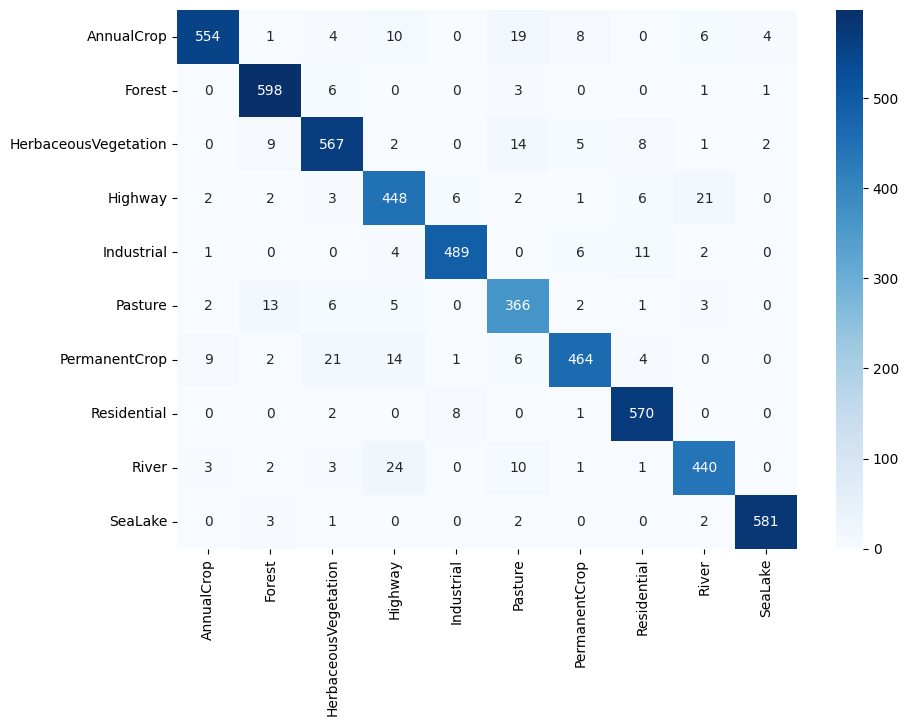

In [31]:
df_pred = pd.read_csv("finished\VGG16\\pred_test.csv")
ds_test = Test_Dataset_EuroSat(ds)
true_val = []
pred_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())
    pred_val.append(df_pred.iloc[i].argmax())
conf = confusion_matrix(true_val,pred_val)
df_cm = pd.DataFrame(conf, index = DS_LABELS,columns = DS_LABELS)
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')

In [32]:
precision_recall_fscore_support(true_val,pred_val, average='macro')

(0.9377263060974073, 0.938110350209531, 0.9375660241389039, None)

In [33]:
accuracy_score(true_val,pred_val)

0.9401851851851852